In [113]:
"""
This script attempts to turn a few knobs in xgboost -- making it more
reliable and hopefully more precise.
"""


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [82]:
train = pd.read_csv('/Users/roberttejada/Desktop/gaia_data_ml/all_gaiasmdata_readyforml.csv')  # Training labeled set

In [83]:
print(len(train))

747497


In [84]:
def abs_mag(p, m):
    return m - 5*np.log10((1000/(p)).astype(np.float64)) + 5


train['M_G'] = abs_mag(train['parallax'].values,
                    train['phot_g_mean_mag'].values)

In [85]:


# Cleaning:
tmags = train[['i_psf', 'z_psf', 'h_m', 'j_m', 'k_m', 'w1mpro', 'w2mpro',
               #'M_G',
               'label']]
# Counter(train['StarType'])
tmags2 = tmags.dropna(how='any')
# Counter(tmags2['StarType'])
tmags3 = tmags2[['i_psf', 'z_psf', 'h_m', 'j_m', 'k_m', 'w1mpro', 'w2mpro',
                 #'M_G'
                ]]

# Mixing the magnitudes to form the colors:


def ccombinator(y):
    mags1 = pd.DataFrame(index=y.index)
    mags2 = pd.DataFrame(index=y.index)
    for a, b, in combinations(y.columns, 2):
        mags1['{}-{}'.format(a, b)] = y[a] - y[b]
        mags2['{}-{}'.format(b, a)] = y[b] - y[a]
    c = mags1.join(mags2)
    return c

In [86]:
print(len(tmags3))

745891


In [87]:
# Joining the color and magnitudes
features = ccombinator(tmags3).join(tmags3, how='outer')

labels = tmags2.label

test_size = 0.50
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=test_size)

model = XGBClassifier(silent=False, 
                        scale_pos_weight=0.5,
                        eta = 0.1,  
                        colsample_bytree = 0.8,
                        subsample = 0.5,
                        objective='binary:logistic', 
                        n_estimators = 100, 
                        reg_alpha = 0.5,
                        max_delta_step = 5,
                        max_depth = 10, 
                        gamma = 10,
                        tree_method='approx')

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "rmse","logloss"], eval_set=eval_set, verbose=True)

# make predictions for test data
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.10f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.015587	validation_0-rmse:0.452653	validation_0-logloss:0.601184	validation_1-error:0.015951	validation_1-rmse:0.452682	validation_1-logloss:0.601231
[1]	validation_0-error:0.015573	validation_0-rmse:0.409728	validation_0-logloss:0.527031	validation_1-error:0.015828	validation_1-rmse:0.409789	validation_1-logloss:0.527134
[2]	validation_0-error:0.015592	validation_0-rmse:0.372667	validation_0-logloss:0.465118	validation_1-error:0.015911	validation_1-rmse:0.372758	validation_1-logloss:0.465252
[3]	validation_0-error:0.015469	validation_0-rmse:0.339608	validation_0-logloss:0.414051	validation_1-error:0.015863	validation_1-rmse:0.339747	validation_1-logloss:0.414239
[4]	validation_0-error:0.015415	validation_0-rmse:0.310396	validation_0-logloss:0.369077	validation_1-error:0.015777	validation_1-rmse:0.310565	validation_1-logloss:0.369289
[5]	validation_0-error:0.01534	validation_0-rmse:0.283451	validation_0-logloss:0.330908	validation_1-error:0.015667	validation_1-r

[48]	validation_0-error:0.014707	validation_0-rmse:0.11042	validation_0-logloss:0.051976	validation_1-error:0.014932	validation_1-rmse:0.112056	validation_1-logloss:0.053888
[49]	validation_0-error:0.014686	validation_0-rmse:0.11037	validation_0-logloss:0.051773	validation_1-error:0.014927	validation_1-rmse:0.11202	validation_1-logloss:0.053716
[50]	validation_0-error:0.014678	validation_0-rmse:0.11034	validation_0-logloss:0.051681	validation_1-error:0.014935	validation_1-rmse:0.111997	validation_1-logloss:0.053652
[51]	validation_0-error:0.014651	validation_0-rmse:0.110297	validation_0-logloss:0.051467	validation_1-error:0.01493	validation_1-rmse:0.111968	validation_1-logloss:0.053472
[52]	validation_0-error:0.014651	validation_0-rmse:0.110263	validation_0-logloss:0.051336	validation_1-error:0.014916	validation_1-rmse:0.111949	validation_1-logloss:0.053376
[53]	validation_0-error:0.014632	validation_0-rmse:0.110232	validation_0-logloss:0.051175	validation_1-error:0.014919	validation_1

[95]	validation_0-error:0.01445	validation_0-rmse:0.109458	validation_0-logloss:0.049995	validation_1-error:0.014758	validation_1-rmse:0.111463	validation_1-logloss:0.052647
[96]	validation_0-error:0.014442	validation_0-rmse:0.109439	validation_0-logloss:0.049953	validation_1-error:0.014739	validation_1-rmse:0.111453	validation_1-logloss:0.05263
[97]	validation_0-error:0.014461	validation_0-rmse:0.109416	validation_0-logloss:0.049919	validation_1-error:0.014737	validation_1-rmse:0.111431	validation_1-logloss:0.052598
[98]	validation_0-error:0.014458	validation_0-rmse:0.109409	validation_0-logloss:0.04991	validation_1-error:0.014737	validation_1-rmse:0.111425	validation_1-logloss:0.052589
[99]	validation_0-error:0.01445	validation_0-rmse:0.109389	validation_0-logloss:0.049876	validation_1-error:0.014758	validation_1-rmse:0.111415	validation_1-logloss:0.052566
Accuracy: 98.5241831257%


In [88]:
Counter(labels)

Counter({'lowmass*': 722481, 'other': 23410})

In [89]:
23410/722481

0.03240223618337368

In [90]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=17)
plt.rc('axes', linewidth=1)

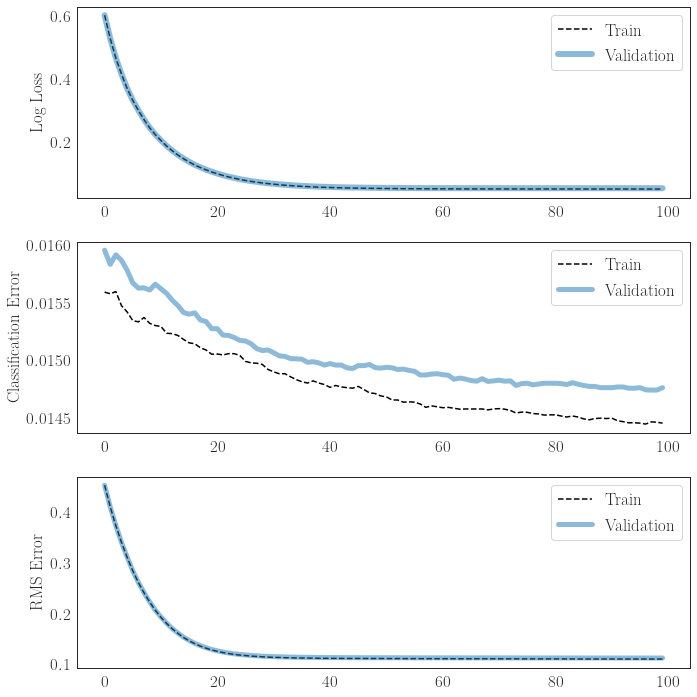

In [91]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(3,1,figsize = (10,10))
ax[0].plot(x_axis, results['validation_0']['logloss'], 'k--',label='Train')
ax[0].plot(x_axis, results['validation_1']['logloss'], label='Validation',lw=6,alpha=0.5)
ax[0].legend()
ax[0].set_ylabel('Log Loss')

# plot classification error

ax[1].plot(x_axis, results['validation_0']['error'], 'k--',label='Train')
ax[1].plot(x_axis, results['validation_1']['error'], label='Validation',lw=5,alpha=0.5)
ax[1].legend()
ax[1].set_ylabel('Classification Error')

ax[2].plot(x_axis, results['validation_0']['rmse'], 'k--',label='Train')
ax[2].plot(x_axis, results['validation_1']['rmse'], label='Validation',lw=5,alpha=0.5)
ax[2].legend()
ax[2].set_ylabel('RMS Error')

plt.savefig('xgb_metric_plots_100n_estimators_conservative.pdf')
plt.tight_layout()
plt.show()

In [92]:
# Predictions:
conmatrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:', conmatrix)
print('Training predictions:', Counter(predictions))

Confusion Matrix: [[360920    373]
 [  5131   6522]]
Training predictions: Counter({'lowmass*': 366051, 'other': 6895})


In [93]:
print('Initizalizing SkyMapper Predictions')
skymapper_refset = pd.read_csv('/Users/roberttejada/Desktop/gaia_data_ml/skymapper_merged_all.csv')
print('skymapper reference read')

Initizalizing SkyMapper Predictions
skymapper reference read


In [94]:
list(skymapper_refset)

['object_id',
 'raj2000',
 'dej2000',
 'e_raj2000',
 'e_dej2000',
 'smss_j',
 'mean_epoch',
 'rms_epoch',
 'glon',
 'glat',
 'flags',
 'nimaflags',
 'ngood',
 'ngood_min',
 'nch_max',
 'u_flags',
 'u_nimaflags',
 'u_ngood',
 'u_nch',
 'u_nvisit',
 'v_flags',
 'v_nimaflags',
 'v_ngood',
 'v_nch',
 'v_nvisit',
 'g_flags',
 'g_nimaflags',
 'g_ngood',
 'g_nch',
 'g_nvisit',
 'r_flags',
 'r_nimaflags',
 'r_ngood',
 'r_nch',
 'r_nvisit',
 'i_flags',
 'i_nimaflags',
 'i_ngood',
 'i_nch',
 'i_nvisit',
 'z_flags',
 'z_nimaflags',
 'z_ngood',
 'z_nch',
 'z_nvisit',
 'class_star',
 'u_psf',
 'e_u_psf',
 'v_psf',
 'e_v_psf',
 'g_psf',
 'e_g_psf',
 'r_psf',
 'e_r_psf',
 'i_psf',
 'e_i_psf',
 'z_psf',
 'e_z_psf',
 'ebmv_sfd',
 'twomass_key1',
 'twomass_dist1',
 'allwise_cntr',
 'allwise_dist',
 'ucac4_mpos',
 'ucac4_dist',
 'galex_bcs_id',
 'galex_bcs_dist',
 'gaia_dr2_id1',
 'gaia_dr2_dist1',
 'raj2000_y',
 'dej2000_y',
 'RAdeg',
 'DEdeg',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'objID',
 'mod

In [95]:
print(len(skymapper_refset))

6128398


In [96]:
skymapper_refset['M_G'] = abs_mag(skymapper_refset['parallax'].values,
                    skymapper_refset['phot_g_mean_mag'].values)

refset = skymapper_refset[['object_id', 'i_psf', 'z_psf',
                           'Hmag_x', 'Jmag_x', 'Kmag_x', 'W1mag', 'W2mag'
                           #,'M_G'
                          ]].dropna(how='any')

refset_4preds = refset[['i_psf', 'z_psf',
                        'Hmag_x', 'Jmag_x', 'Kmag_x', 'W1mag', 'W2mag'
                        #,'M_G'
                       ]]

refset_4preds = refset_4preds.rename(index=str, columns={"Hmag_x": "h_m",
                                                         "Jmag_x": "j_m", "Kmag_x": "k_m", "W1mag": "w1mpro", "W2mag": "w2mpro"})
print('refset read')
features_colors = ccombinator(refset_4preds)

features_ref = features_colors.join(refset_4preds, how='outer')

smpredictions = model.predict(features_ref)
print('SkyMapper Predictions:', Counter(smpredictions))

/Users/roberttejada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/roberttejada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


refset read
SkyMapper Predictions: Counter({'lowmass*': 4770190, 'other': 1116787})


In [97]:
#---------------------------Gaia Analysis-------------------------------------#

# Absolute Magntude equation:
print('Initizalizing Gaia Analysis')


refset.insert(loc=8, column='xgb_predictions', value=smpredictions)

df = refset[['object_id', 'xgb_predictions']]

smrefset_wpreds = skymapper_refset.merge(df, how='inner', on='object_id')

Initizalizing Gaia Analysis


In [98]:
# Getting the G-RP color for magnitude analysis:
g_rp = smrefset_wpreds['phot_g_mean_mag'] - smrefset_wpreds['phot_rp_mean_mag']

smrefset_wpreds['g_rp'] = g_rp

#smrefset_wpreds.insert(loc=195, column='g_rp', value=g_rp)

In [121]:
# No negative parallaxes or nans:
smrefset_par = smrefset_wpreds[(smrefset_wpreds['parallax'] > 0)]

In [123]:
gaia_test = smrefset_par[['g_rp', 'phot_g_mean_mag', 'parallax', 'M_G',
                          'xgb_predictions']].dropna(how='any')

giants_pred = gaia_test[gaia_test['xgb_predictions'] == 'other']
dwarfs_pred = gaia_test[gaia_test['xgb_predictions'] == 'lowmass*']

In [124]:
print('giant/dwarf ratio is:',len(giants_pred)/len(dwarfs_pred))

giant/dwarf ratio is: 0.06313676740505433


In [125]:
print('Giant predictions:', len(giants_pred))
print('Dwarf predictions:',len(dwarfs_pred))

Giant predictions: 33470
Dwarf predictions: 530119


In [126]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=17)
plt.rc('axes', linewidth=1)

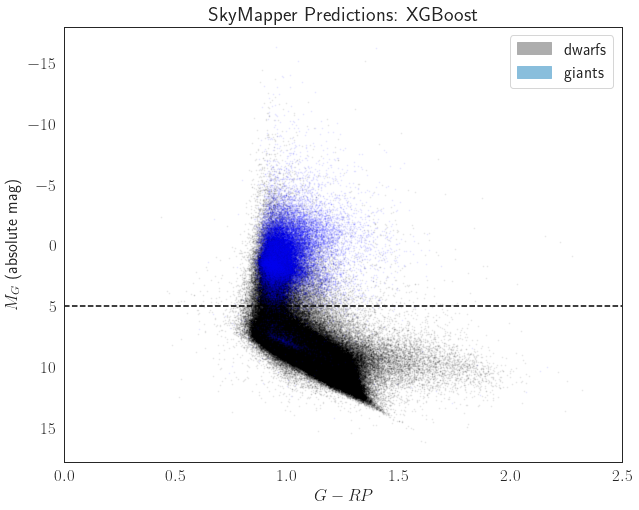

XGB Script Finished!


In [174]:
#----------------------------Plot Results-------------------------------------#

sns.set_style("white")

plt.figure(figsize=(10,8))
plt.scatter(dwarfs_pred['g_rp'],
            abs_mag(dwarfs_pred['parallax'].values,
                    dwarfs_pred['phot_g_mean_mag'].values), s=1, c='k', alpha=0.05,
            label='pred. dwarfs')
plt.scatter(giants_pred['g_rp'],
            abs_mag(giants_pred['parallax'].values,
                    giants_pred['phot_g_mean_mag'].values), s=1, c='b', alpha=0.05,
            label='pred. other')
plt.axhline(y=5,ls='--',c='k')
plt.xlabel(r'$G - RP$')
plt.ylabel(r'$M_G$ (absolute mag)')
plt.xlim(0.0, 2.5)
# plt.legend()
# plt.tight_layout()
plt.gca().invert_yaxis()
plt.title('SkyMapper Predictions: XGBoost')

k = sns.color_palette("Greys")[2]
b = sns.color_palette("Blues")[2]
#g = sns.color_palette("Greens")[2]

black_patch = mpatches.Patch(color=k, label='dwarfs')
blue_patch = mpatches.Patch(color=b, label='giants')
#green_patch = mpatches.Patch(color=g, label='LIC')

sns.reset_orig
plt.legend(handles=[black_patch, blue_patch])
plt.minorticks_on()
plt.savefig('skymapper_xgb_predictions_gaia_100_nestimators_conservative.pdf')
plt.show()


print('XGB Script Finished!')

In [128]:
dwarfs_err = dwarfs_pred[dwarfs_pred['M_G'] <= 5.0]
giants_err = giants_pred[giants_pred['M_G'] > 5.0]

print(len(dwarfs_err),len(other_err))

26177 869


In [129]:
print('Giant error/prediction ratio:',len(giants_err)/len(giants_pred))
print('Dwarf error/prediction ratio:',len(dwarfs_err)/len(dwarfs_pred))

Giant error/prediction ratio: 0.02596354944726621
Dwarf error/prediction ratio: 0.049379478947179783


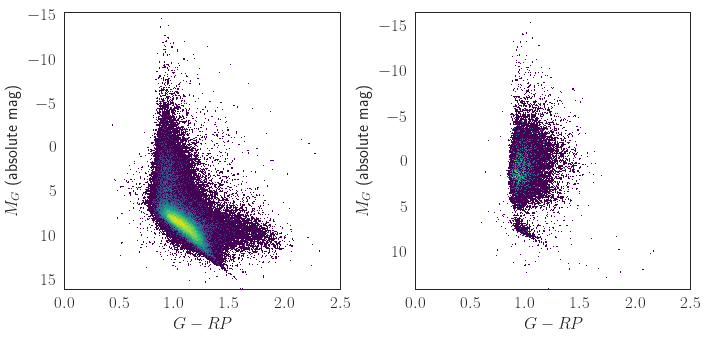

In [171]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
#plt.figure(figsize = (15,15))
ax[0].hist2d(dwarfs_pred['g_rp'],
            dwarfs_pred['M_G'],norm=LogNorm(),bins=1000,cmap='viridis')
ax[0].set_xlabel(r'$G - RP$')
ax[0].set_ylabel(r'$M_G$ (absolute mag)')
ax[0].set_xlim(0.0, 2.5)
ax[0].minorticks_on()
ax[0].invert_yaxis()
#plt.title('SkyMapper Predictions: XGBoost')

ax[1].hist2d(giants_pred['g_rp'],
            giants_pred['M_G'],norm=LogNorm(),bins=1000,cmap='viridis')
ax[1].set_xlabel(r'$G - RP$')
ax[1].set_ylabel(r'$M_G$ (absolute mag)')
ax[1].set_xlim(0.0, 2.5)
ax[1].minorticks_on()
ax[1].invert_yaxis()
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(ax,cax=cbar_ax)
fig.tight_layout()
#plt.colorbar()
plt.show()

